In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm

C:\Users\Dell\AppData\Local\Temp\ipykernel_18300\3696217016.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\diamonds.csv")

In [4]:
data.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
data=data.drop(['depth','table','x','y','z'],axis=1)

In [9]:
data.head(2)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326


In [10]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
dtype: object

In [11]:
data['price']=data.price.astype(float)
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price      float64
dtype: object

Text(0.5, 1.0, 'Diamond Price distribution')

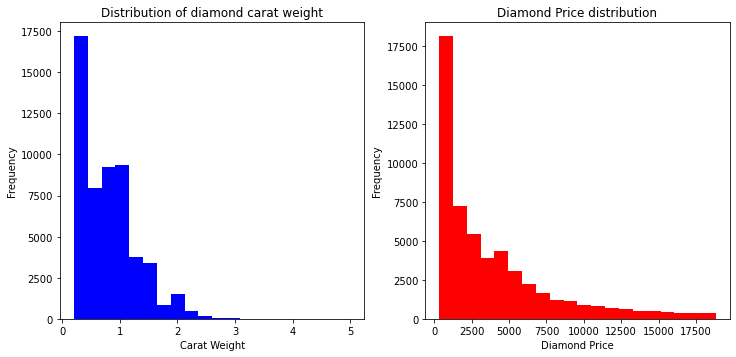

In [12]:
plt.figure(figsize=[12,12])
plt.subplot(221)
#carat weight distribution
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of diamond carat weight')
plt.subplot(222)
#distribution of price value
plt.hist(data['price'],bins=20,color='r')
plt.xlabel('Diamond Price')
plt.ylabel('Frequency')
plt.title('Diamond Price distribution')

In [13]:
data.head(1)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326.0


In [14]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
label=l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [15]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [16]:
data['cut_label']=label

In [17]:
data.head(10)

,carat,cut,color,clarity,price,cut_label
0,0.23,Ideal,E,SI2,326.0,2
1,0.21,Premium,E,SI1,326.0,3
2,0.23,Good,E,VS1,327.0,1
3,0.29,Premium,I,VS2,334.0,3
4,0.31,Good,J,SI2,335.0,1
5,0.24,Very Good,J,VVS2,336.0,4
6,0.24,Very Good,I,VVS1,336.0,4
7,0.26,Very Good,H,SI1,337.0,4
8,0.22,Fair,E,VS2,337.0,0
9,0.23,Very Good,H,VS1,338.0,4


In [18]:
l2=LabelEncoder()
label1=l2.fit_transform(data['clarity'])
data['clarity_label']=label1
data.head(10)

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,E,SI2,326.0,2,3
1,0.21,Premium,E,SI1,326.0,3,2
2,0.23,Good,E,VS1,327.0,1,4
3,0.29,Premium,I,VS2,334.0,3,5
4,0.31,Good,J,SI2,335.0,1,3
5,0.24,Very Good,J,VVS2,336.0,4,7
6,0.24,Very Good,I,VVS1,336.0,4,6
7,0.26,Very Good,H,SI1,337.0,4,2
8,0.22,Fair,E,VS2,337.0,0,5
9,0.23,Very Good,H,VS1,338.0,4,4


In [19]:
data['color']=data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8})


In [20]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [21]:
data['color'].isnull().sum()


0

In [22]:
data.head(2)

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2


In [23]:
y=data['price']
y.head(1)

0    326.0
Name: price, dtype: float64

In [24]:
x=data.drop(['price','cut','clarity'],axis=1)
x.head(1)

,carat,color,cut_label,clarity_label
0,0.23,2,2,3


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [26]:
len(x_train)

43152

In [27]:
len(y_test)

10788

In [28]:
len(data)

53940

In [29]:
43152+10788

53940

In [30]:
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


In [31]:
data.tail()

,carat,cut,color,clarity,price,cut_label,clarity_label
53935,0.72,Ideal,1,SI1,2757.0,2,2
53936,0.72,Good,1,SI1,2757.0,1,2
53937,0.70,Very Good,1,SI1,2757.0,4,2
53938,0.86,Premium,5,SI2,2757.0,3,3
53939,0.75,Ideal,1,SI2,2757.0,2,3


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

In [34]:
#accuracy with linear regression
from sklearn.metrics import r2_score
lr=r2_score(y_test,pred)*100
print(lr)

87.76517206528275


In [35]:
#accuracy with decision tree
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1=reg.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
dtr=r2_score(y_test,pred1)*100
print(dtr)

97.1150190882552


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
rfr=r2_score(y_test,pred2)*100
print(rfr)

97.75670906276332


In [39]:
def prediction():
    carat=(input('Enter the value of carat: '))
    cut=int(input('Enter the value of cut: '))
    clarity=int(input('Enter the value of clarity: '))
    color=int(input('Enter the value of color: '))
    price=rf.predict([[carat,cut,clarity,color]])
    print("Approximately Price pf Diamonds is:",price,'Rs')
pred1=prediction()
pred1

Enter the value of carat: 0.23
Enter the value of cut: 2
Enter the value of clarity: 2
Enter the value of color: 1
Approximately Price pf Diamonds is: [3706.765] Rs
